In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from hc_lib.plots.figlib import FigureLibrary
import seaborn

/software/spack-software/2020.05.14/linux-rhel8-ivybridge/gcc-8.4.0/python-3.7.7-zgcjuclie3fiis4ljkrfp4c4j6fkoa62/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
base = '/lustre/cosinga/hcolor/output/'
path = base + 'galhisub_test_tng100B_099S_0A_800R/results/'
hgfile = pkl.load(open(path + 'hisubhaloXgalaxy_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))


In [18]:
flib = FigureLibrary(hgfile, 'pk')

{'color': 'all'}
{'color': 'all'}
{'color': 'all'}
{'color': 'all'}


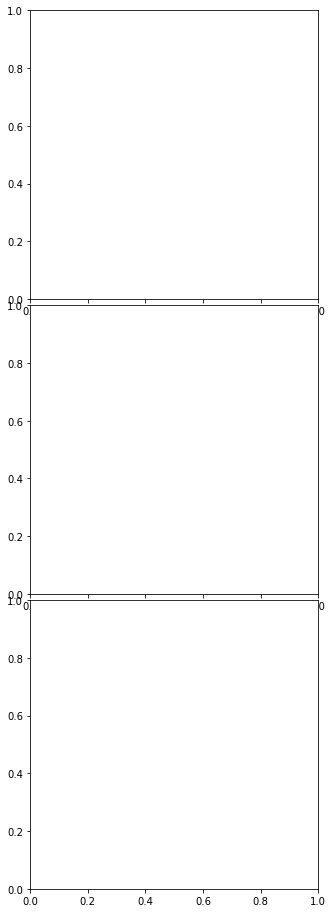

In [19]:
# HI bins
thdefs = ['low-threshold', 'mid-threshold', 'high-threshold', 'higher-threshold']
bindefs = ['lowest-bin', 'low-bin', 'mid-bin', 'high-bin']

ip = {'HI_res':bindefs, 'gal_res' : 'diemer', 'species':'stmass'}
rmp = {'color': 'all'}
flib.createFigGrid(3,1, panel_length = 4)
figarr = flib.arrangeResults(ip, 'color', ['resolved', 'blue', 'red'], 'space', ['real'], 'HI_res',
                            rmprops = rmp)
fig, panels = flib.getFig()

In [20]:
for i in range(figarr.shape[0]):
    for j in range(figarr.shape[1]):
        print(len(figarr[i,j]))

36
36
36


In [21]:
# make bins plots
colors = {}
labels = {}
for bn in bindefs:
    if 'high' in bn:
        colors[bn] = 'saddlebrown'
        labels[bn] = '10$^9$ $\\leq$ M$_{\\rm{HI}}$ / M$_{\\odot}$'

    elif 'lowest' in bn:
        colors[bn] = 'moccasin'
        labels[bn] = 'M$_{\\rm{HI}}$ / M$_{\\odot}$ < 10$^7$'
    elif 'low' in bn:
        colors[bn] = 'tan'
        labels[bn] = '10$^7$ $\\leq$ M$_{\\rm{HI}}$ / M$_{\\odot}$ < 10$^8$'
    elif 'mid' in bn:
        colors[bn] = 'chocolate'
        labels[bn] = '10$^8$ $\\leq$ M$_{\\rm{HI}}$ / M$_{\\odot}$ < 10$^9$'

dim = flib.getDim()
for i in range(dim[0]):
    for j in range(dim[1]):
        idx = (i, j)
        
        for bn in bindefs:
            ip = {'HI_res':bn}
            fkw = {'color':colors[bn], 'label':labels[bn]}
            flib.plotFill(idx, ip, fill_kwargs = fkw)
            
         
    

In [22]:
# axes
flib.xLimAdjustToNyquist()
flib.flushYAxisToData()
flib.matchAxisLimits()
flib.logAxis()

# ticks
flib.removeDefaultTickLabels()
flib.changeTickParams()

# labels
colkw = {'fontsize':14}
legkw = {'fontsize':10, 'loc':'upper right'}
flib.colLabels(['Real Space', 'Redshift Space'], txt_kwargs = colkw)
colkw['ha'] = 'left'; colkw['va']= 'bottom'
flib.rowLabels(['All Galaxies', 'Blue Galaxies', 'Red Galaxies'], txt_kwargs = colkw)
flib.addLegend(idx = (2,0), kwargs = legkw)
flib.axisLabel('x')
flib.axisLabel('y', subscript = '\\rm{HI-gal}', txt_kwargs = {'rotation':'vertical'})

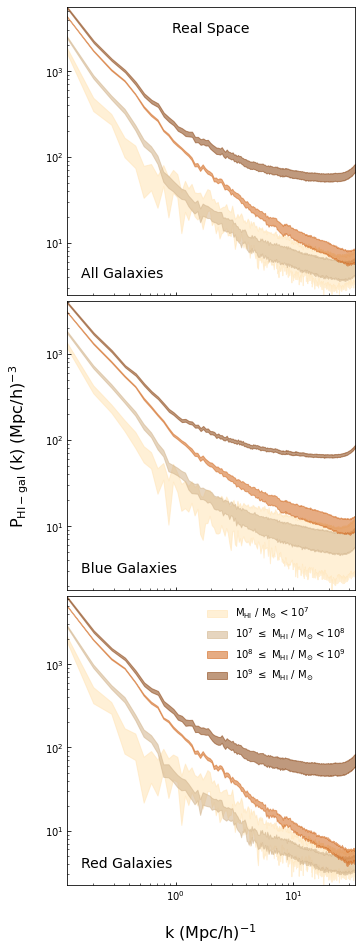

In [23]:
fig